# Métodos Matemáticos Aplicados  EQE-703 1/2024    11/05/2024   J.Luiz <br>
## Trabalho 1 : Matrizes, Sistemas Lineares, Formas Quadráticas, Autovetores e Autovalores <br>

### Questão 2
Considere o problema do GPS. Um ponto $P$ emissor de sinal sobre a superfície da Terra terá seu vetor posição ($\mathbf{r}^t = [X, Y, Z]$) calculado a partir das leituras de distâncias de $P$ a 3 satélites geo-estacionários que melhor captaram o sinal de $P$. Estas três distâncias são $R_1, R_2, R_3$. As posições dos três satélites em questão são dadas pelos vetores $\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3$. Em um dado problema conhecem-se os valores de $\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3$ e de $R_1, R_2, R_3$. O objetivo é determinar $\mathbf{r}$. O problema pode ser entendido como buscar a interseção de três esferas de raios $R_1, R_2, R_3$ centradas, respectivamente, em $\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3$.

### (i) Apresente a formulação matemática do problema descrevendo as variáveis e equações disponíveis na forma $F(\mathbf{r}) = 0$

Vamos definir as variáveis:

- $\mathbf{r} = [X \ Y \ Z]^T$ é o vetor posição do ponto $P$.
- $\mathbf{r}_1 = [X_1 \ Y_1 \ Z_1]^T$, $\mathbf{r}_2 = [X_2 \ Y_2 \ Z_2]^T$, $\mathbf{r}_3 = [X_3 \ Y_3 \ Z_3]^T$ são os vetores posição dos satélites 1, 2 e 3, respectivamente.
- $R_1$, $R_2$, $R_3$ são as distâncias de $P$ aos satélites 1, 2 e 3, respectivamente.

As equações das esferas são dadas por:

1. $(X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 = R_1^2$
2. $(X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 = R_2^2$
3. $(X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 = R_3^2$

Estas são as três equações que descrevem as esferas centradas nos satélites com os respectivos raios.

**Formulação matemática:**

$
F(\mathbf{r}) = 
\begin{cases}
(X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 = 0 \\
(X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 = 0 \\
(X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 = 0
\end{cases}
$

Nosso objetivo é encontrar o vetor posição $\mathbf{r} = [X \ Y \ Z]^T$ que satisfaça essas três equações simultaneamente.


### (ii) Apresente a expressão da matriz jacobiana das Eqs. (1), isto é:

A matriz jacobiana $J$ é dada por:

$
J = \left[ \nabla_\mathbf{r} F \right]^T
$

onde $\nabla_\mathbf{r} F$ é o gradiente de $F$ com respeito a $\mathbf{r}$.

Vamos calcular as derivadas parciais das equações das esferas em relação a $X$, $Y$ e $Z$.

Para a primeira equação:

$
(X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 = R_1^2
$

As derivadas parciais são:

$
\frac{\partial F_1}{\partial X} = 2(X - X_1), \quad \frac{\partial F_1}{\partial Y} = 2(Y - Y_1), \quad \frac{\partial F_1}{\partial Z} = 2(Z - Z_1)
$

De maneira similar, para as outras duas equações:

$
\frac{\partial F_2}{\partial X} = 2(X - X_2), \quad \frac{\partial F_2}{\partial Y} = 2(Y - Y_2), \quad \frac{\partial F_2}{\partial Z} = 2(Z - Z_2)
$

$
\frac{\partial F_3}{\partial X} = 2(X - X_3), \quad \frac{\partial F_3}{\partial Y} = 2(Y - Y_3), \quad \frac{\partial F_3}{\partial Z} = 2(Z - Z_3)
$

Portanto, a matriz jacobiana $J$ é:

$
J = \begin{bmatrix}
2(X - X_1) & 2(Y - Y_1) & 2(Z - Z_1) \\
2(X - X_2) & 2(Y - Y_2) & 2(Z - Z_2) \\
2(X - X_3) & 2(Y - Y_3) & 2(Z - Z_3)
\end{bmatrix}
$

Considerando os dados (em $10^3$ km):

$
\mathbf{r}_1 = \begin{bmatrix} 8 \\ 2 \\ 0 \end{bmatrix}, \quad \mathbf{r}_2 = \begin{bmatrix} 9 \\ 0 \\ 0 \end{bmatrix}, \quad \mathbf{r}_3 = \begin{bmatrix} 8 \\ 8 \\ 0 \end{bmatrix}
$

e para as distâncias do objeto aos satélites:

$
R_1 = 10, \quad R_2 = 10, \quad R_3 = 10
$

Substituindo os valores dos vetores posição dos satélites e das distâncias na matriz jacobiana.

$
J = \begin{bmatrix}
2(X - 8) & 2(Y - 2) & 2(Z - 0) \\
2(X - 9) & 2(Y - 0) & 2(Z - 0) \\
2(X - 8) & 2(Y - 8) & 2(Z - 0)
\end{bmatrix}
$

### (iii) Com o MATLAB plote os centros dos 3 satélites em 3D (PLOT3) e em seguida desenhe com SURF as 3 esferas centradas em cada um (use uma palete clara e "cheguei" como COOL). Com ROTATE3D pesquise ao redor da imagem por pontos candidatos a serem solução do problema. Salve estas imagens no documento de resolução indicando com "flechinhas" as possíveis soluções.

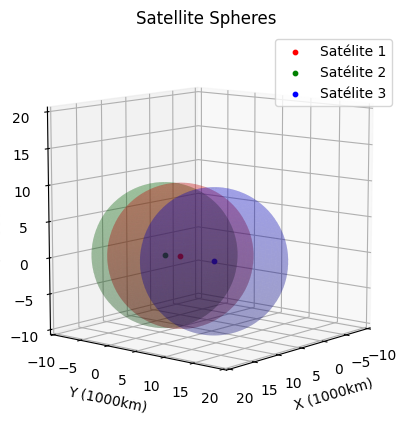

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Satellites centers
r1 = np.array([8, 2, 0])
r2 = np.array([9, 0, 0])
r3 = np.array([8, 8, 0])

# Spheres radius
R1 = 10
R2 = 10
R3 = 10

# Plot grid
phi, theta = np.mgrid[0.0:2.0*np.pi:100j, 0.0:np.pi:50j]

# Function to plot sphere
def plot_sphere(ax, center, radius, color):
    x = center[0] + radius * np.sin(theta) * np.cos(phi)
    y = center[1] + radius * np.sin(theta) * np.sin(phi)
    z = center[2] + radius * np.cos(theta)
    ax.plot_surface(x, y, z, color=color, alpha=0.2)

# Figure creation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot satellites centers
ax.scatter(r1[0], r1[1], r1[2], color='r', s=10, label='Satélite 1')
ax.scatter(r2[0], r2[1], r2[2], color='g', s=10, label='Satélite 2')
ax.scatter(r3[0], r3[1], r3[2], color='b', s=10, label='Satélite 3')

# Plot spheres
plot_sphere(ax, r1, R1, 'r')
plot_sphere(ax, r2, R2, 'g')
plot_sphere(ax, r3, R3, 'b')

# Plot configuration
ax.set_xlabel('X (1000km)')
ax.set_ylabel('Y (1000km)')
ax.set_zlabel('Z (1000km)')
ax.set_title('Satellite Spheres')
ax.legend()

# Scale adjust
ax.set_box_aspect([1,1,1])  # equalizing axis scales
ax.set_xlim([-10, 20])
ax.set_ylim([-10, 20])
ax.set_zlim([-10, 20])
ax.view_init(elev=10, azim=40)  # Adjust azimuth to move plot left/right

plt.show()


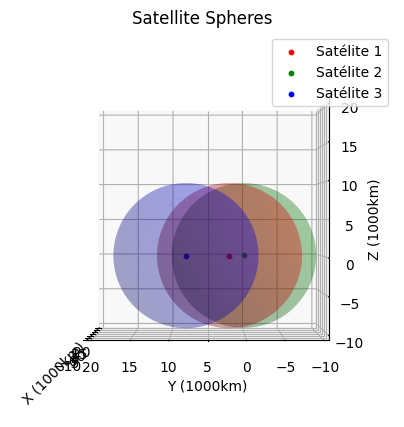

In [2]:
# Figure creation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot satellites centers
ax.scatter(r1[0], r1[1], r1[2], color='r', s=10, label='Satélite 1')
ax.scatter(r2[0], r2[1], r2[2], color='g', s=10, label='Satélite 2')
ax.scatter(r3[0], r3[1], r3[2], color='b', s=10, label='Satélite 3')

# Plot spheres
plot_sphere(ax, r1, R1, 'r')
plot_sphere(ax, r2, R2, 'g')
plot_sphere(ax, r3, R3, 'b')

# Plot configuration
ax.set_xlabel('X (1000km)')
ax.set_ylabel('Y (1000km)')
ax.set_zlabel('Z (1000km)')
ax.set_title('Satellite Spheres')
ax.legend()

# Scale adjust
ax.set_box_aspect([1,1,1])  # equalizing axis scales
ax.set_xlim([-10, 20])
ax.set_ylim([-10, 20])
ax.set_zlim([-10, 20])
ax.view_init(elev=0, azim=180)  # Adjust azimuth to move plot left/right

plt.show()

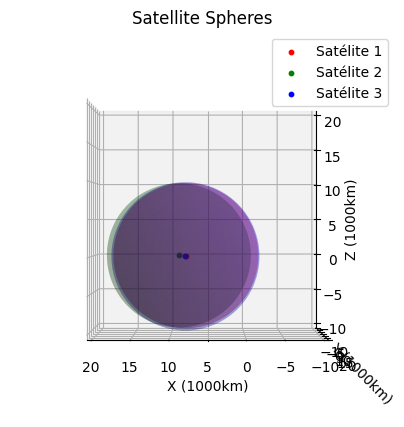

In [3]:
# Figure creation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot satellites centers
ax.scatter(r1[0], r1[1], r1[2], color='r', s=10, label='Satélite 1')
ax.scatter(r2[0], r2[1], r2[2], color='g', s=10, label='Satélite 2')
ax.scatter(r3[0], r3[1], r3[2], color='b', s=10, label='Satélite 3')

# Plot spheres
plot_sphere(ax, r1, R1, 'r')
plot_sphere(ax, r2, R2, 'g')
plot_sphere(ax, r3, R3, 'b')

# Plot configuration
ax.set_xlabel('X (1000km)')
ax.set_ylabel('Y (1000km)')
ax.set_zlabel('Z (1000km)')
ax.set_title('Satellite Spheres')
ax.legend()

# Scale adjust
ax.set_box_aspect([1,1,1])  # equalizing axis scales
ax.set_xlim([-10, 20])
ax.set_ylim([-10, 20])
ax.set_zlim([-10, 20])
ax.view_init(elev=0, azim=90)  # Adjust azimuth to move plot left/right

plt.show()

### (iv) A partir de um chute inicial razoável, determine r com o Método Newton-Raphson executado em MATLAB, e plotando em 3D sobre a figura anterior os pontos da marcha Newton-Raphson em busca da solução (ou das soluções). Para isto use HOLD ON e PLOT3 com "bolinhas" bem "grossinhas" em vermelho para cada ponto da marcha NR.  

initial r: [10, 5, 15]
r =  [16.5         5.          9.53333333]
r =  [16.5         5.          5.75005828]
r =  [16.5        5.         4.5054474]
r =  [16.5         5.          4.33353814]
r =  [16.5         5.          4.33012836]
r =  [16.5         5.          4.33012702]
r =  [16.5         5.          4.33012702]


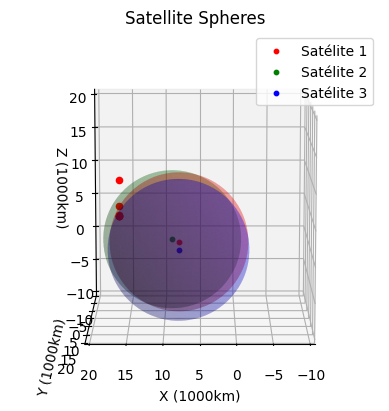

In [4]:
# Sphere functions
def f1(r):
    return (r[0] - r1[0])**2 + (r[1] - r1[1])**2 + (r[2] - r1[2])**2 - 100

def f2(r):
    return (r[0] - r2[0])**2 + (r[1] - r2[1])**2 + (r[2] - r2[2])**2 - 100

def f3(r):
    return (r[0] - r3[0])**2 + (r[1] - r3[1])**2 + (r[2] - r3[2])**2 - 100

# Gradients (Jacobian)
def jacobian(r):
    return np.array([
        [2*(r[0] - r1[0]), 2*(r[1] - r1[1]), 2*(r[2]-r1[2])],
        [2*(r[0] - r2[0]), 2*(r[1] - r2[1]), 2*(r[2]-r2[2])],
        [2*(r[0] - r3[0]), 2*(r[1] - r3[1]), 2*(r[2]-r3[2])]
        ])

# Newton-Raphson method
def newton_raphson(r_init, tol=1e-6, max_iter=100):
    r = np.array(r_init, dtype=float)
    for i in range(max_iter):
        F = np.array([f1(r), f2(r), f3(r)])
        J = jacobian(r)
        delta_r = np.linalg.solve(J, -F)
        r = r + delta_r
        print('r = ', r)
        
        # Plot interation point
        ax.scatter(r[0], r[1], r[2], color='r', s=20, marker='o')
        if np.linalg.norm(delta_r) < tol:
            break
    return r

# Plot grid
phi, theta = np.mgrid[0.0:2.0*np.pi:100j, 0.0:np.pi:50j]

# Figure creation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot satellites centers
ax.scatter(r1[0], r1[1], r1[2], color='r', s=10, label='Satélite 1')
ax.scatter(r2[0], r2[1], r2[2], color='g', s=10, label='Satélite 2')
ax.scatter(r3[0], r3[1], r3[2], color='b', s=10, label='Satélite 3')

# Plot spheres
plot_sphere(ax, r1, R1, 'r')
plot_sphere(ax, r2, R2, 'g')
plot_sphere(ax, r3, R3, 'b')

# Plot configuration
ax.set_xlabel('X (1000km)')
ax.set_ylabel('Y (1000km)')
ax.set_zlabel('Z (1000km)')
ax.set_title('Satellite Spheres')
ax.legend()

# Scale adjust
ax.set_box_aspect([1,1,1])  # equalizing axis scales
ax.set_xlim([-10, 20])
ax.set_ylim([-10, 20])
ax.set_zlim([-10, 20])
ax.view_init(elev=10, azim=90)  # Adjust azimuth to move plot left/right

# Newton-Raphson Call
r_init = [10, 5, 15]
print('initial r:' , r_init)

sol = newton_raphson(r_init)

plt.show()


### (v) Coloque o problema como um Problema de Otimização Irrestrita tendo a forma da Eq. (3). Obtenha a Função Objetivo $G(r)$. 

Cada equação das esferas representa a condição de que a distância do ponto $ \mathbf{r} $ ao centro do satélite deve ser igual à distância medida $ R_i $. Ou seja, quando $ F_i (r) $ = 0 

$$
F_i(\mathbf{r}) = (X - X_i)^2 + (Y - Y_i)^2 + (Z - Z_i)^2 - R_i^2 = 0
$$

A função objetivo será definida como a soma dos quadrados das funções $ F_i(\mathbf{r}) $. <br>
Isso significa que qualquer diferença entre a distância medida e a distância calculada é amplificada, garantindo que o método de minimização encontre o ponto $ \mathbf{r} $ que mais precisamente satisfaz todas as três equações ao mesmo tempo.

$$
G(\mathbf{r}) = F_1^2(\mathbf{r}) + F_2^2(\mathbf{r}) + F_3^2(\mathbf{r})
$$


Quando $ G(\mathbf{r}) $ é minimizado (ou seja, quando $ G(\mathbf{r}) = 0 $), isso implica que todas as três equações $ F_i(\mathbf{r}) $ são satisfeitas simultaneamente:

$$
F_1(\mathbf{r}) = 0, \quad F_2(\mathbf{r}) = 0, \quad F_3(\mathbf{r}) = 0
$$

Assim a função objetivo resulta em:<br>

$$
G(\mathbf{r}) = \left[ (X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 \right]^2 + \left[ (X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 \right]^2 + \left[ (X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 \right]^2
$$

Minimizar $ G(\mathbf{r}) $ encontra o ponto $ \mathbf{r} $ que está na interseção das três esferas definidas pelas distâncias $ R_1, R_2, R_3 $ a partir dos satélites. Este ponto $ \mathbf{r} $ é a posição correta do ponto $ P $ no espaço.

Desta forma, a função objetivo $ G(\mathbf{r}) $ se torna essencialmente em uma medida de erro. <br>
Minimizando esta medida de erro (ao torná-la zero), garante que encontramos a posição $ \mathbf{r} $ que satisfaz as condições geométricas impostas pelas distâncias aos satélites.

Assim, o problema de otimização irrestrita pode ser formulado como:
$$
\min G(\mathbf{r})
$$
sujeito a:
$$
\mathbf{r} = (X, Y, Z)
$$
onde:
$$
G(\mathbf{r}) = \left[ (X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 \right]^2 + \left[ (X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 \right]^2 + \left[ (X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 \right]^2
$$


#### (vi) Obter o Gradiente ( $g = \nabla_r G$ ) e a Matriz Hessiana ( $H = \nabla_r \nabla_r^T G$ ) da Função Objetivo acima

O gradiente da função objetivo \( G(\mathbf{r}) \) é dado por:

$$
\nabla_\mathbf{r} G = \begin{bmatrix}
\frac{\partial G}{\partial X} \\
\frac{\partial G}{\partial Y} \\
\frac{\partial G}{\partial Z}
\end{bmatrix}
$$

Podemos calcular cada componente do gradiente:

$$
\frac{\partial G}{\partial X} = 2 F_1 \frac{\partial F_1}{\partial X} + 2 F_2 \frac{\partial F_2}{\partial X} + 2 F_3 \frac{\partial F_3}{\partial X}
$$

$$
\frac{\partial G}{\partial Y} = 2 F_1 \frac{\partial F_1}{\partial Y} + 2 F_2 \frac{\partial F_2}{\partial Y} + 2 F_3 \frac{\partial F_3}{\partial Y}
$$

$$
\frac{\partial G}{\partial Z} = 2 F_1 \frac{\partial F_1}{\partial Z} + 2 F_2 \frac{\partial F_2}{\partial Z} + 2 F_3 \frac{\partial F_3}{\partial Z}
$$

Onde:

$$
\frac{\partial F_1}{\partial X} = 2(X - X_1), \quad \frac{\partial F_1}{\partial Y} = 2(Y - Y_1), \quad \frac{\partial F_1}{\partial Z} = 2(Z - Z_1)
$$

$$
\frac{\partial F_2}{\partial X} = 2(X - X_2), \quad \frac{\partial F_2}{\partial Y} = 2(Y - Y_2), \quad \frac{\partial F_2}{\partial Z} = 2(Z - Z_2)
$$

$$
\frac{\partial F_3}{\partial X} = 2(X - X_3), \quad \frac{\partial F_3}{\partial Y} = 2(Y - Y_3), \quad \frac{\partial F_3}{\partial Z} = 2(Z - Z_3)
$$

Portanto, o gradiente completo é:

$$
\nabla_\mathbf{r} G = 2 \begin{bmatrix}
F_1 (2(X - X_1)) + F_2 (2(X - X_2)) + F_3 (2(X - X_3)) \\
F_1 (2(Y - Y_1)) + F_2 (2(Y - Y_2)) + F_3 (2(Y - Y_3)) \\
F_1 (2(Z - Z_1)) + F_2 (2(Z - Z_2)) + F_3 (2(Z - Z_3))
\end{bmatrix}
$$

#### Matriz Hessiana da Função Objetivo

A matriz Hessiana \( H \) é dada por:

$$
H = \nabla_\mathbf{r} \nabla_\mathbf{r}^T G
$$

Os elementos da matriz Hessiana são as segundas derivadas parciais de \( G \):

$$
H = \begin{bmatrix}
\frac{\partial^2 G}{\partial X^2} & \frac{\partial^2 G}{\partial X \partial Y} & \frac{\partial^2 G}{\partial X \partial Z} \\
\frac{\partial^2 G}{\partial Y \partial X} & \frac{\partial^2 G}{\partial Y^2} & \frac{\partial^2 G}{\partial Y \partial Z} \\
\frac{\partial^2 G}{\partial Z \partial X} & \frac{\partial^2 G}{\partial Z \partial Y} & \frac{\partial^2 G}{\partial Z^2}
\end{bmatrix}
$$

Vamos calcular as segundas derivadas:

$$
\frac{\partial^2 G}{\partial X^2} = 2 \left( (\frac{\partial F_1}{\partial X})^2 + F_1 \frac{\partial^2 F_1}{\partial X^2} + (\frac{\partial F_2}{\partial X})^2 + F_2 \frac{\partial^2 F_2}{\partial X^2} + (\frac{\partial F_3}{\partial X})^2 + F_3 \frac{\partial^2 F_3}{\partial X^2} \right)
$$

$$
\frac{\partial^2 F_1}{\partial X^2} = 2, \quad \frac{\partial^2 F_2}{\partial X^2} = 2, \quad \frac{\partial^2 F_3}{\partial X^2} = 2
$$

De forma similar, podemos calcular as outras segundas derivadas parciais:

$$
\frac{\partial^2 G}{\partial X \partial Y} = 2 \left( \frac{\partial F_1}{\partial X} \frac{\partial F_1}{\partial Y} + F_1 \frac{\partial^2 F_1}{\partial X \partial Y} + \frac{\partial F_2}{\partial X} \frac{\partial F_2}{\partial Y} + F_2 \frac{\partial^2 F_2}{\partial X \partial Y} + \frac{\partial F_3}{\partial X} \frac{\partial F_3}{\partial Y} + F_3 \frac{\partial^2 F_3}{\partial X \partial Y} \right)
$$

$$
\frac{\partial^2 F_1}{\partial X \partial Y} = 0, \quad \frac{\partial^2 F_2}{\partial X \partial Y} = 0, \quad \frac{\partial^2 F_3}{\partial X \partial Y} = 0
$$

E assim por diante para os outros termos da Hessiana. A matriz Hessiana completa é então:

$$
H = 2 \begin{bmatrix}
4 \sum_i F_i (X - X_i)^2 + \sum_i F_i & \sum_i (X - X_i)(Y - Y_i) & \sum_i (X - X_i)(Z - Z_i) \\
\sum_i (X - X_i)(Y - Y_i) & 4 \sum_i F_i (Y - Y_i)^2 + \sum_i F_i & \sum_i (Y - Y_i)(Z - Z_i) \\
\sum_i (X - X_i)(Z - Z_i) & \sum_i (Y - Y_i)(Z - Z_i) & 4 \sum_i F_i (Z - Z_i)^2 + \sum_i F_i
\end{bmatrix}
$$

Onde $ i \in \{1, 2, 3\} $.


In [11]:
import sympy as sp

# Variáveis simbólicas
X, Y, Z = sp.symbols('X Y Z')
X1, Y1, Z1 = 8, 2, 0
X2, Y2, Z2 = 9, 0, 0
X3, Y3, Z3 = 8, 8, 0
R1, R2, R3 = 10, 10, 10

# Funções das esferas
F1 = (X - X1)**2 + (Y - Y1)**2 + (Z - Z1)**2 - R1**2
F2 = (X - X2)**2 + (Y - Y2)**2 + (Z - Z2)**2 - R2**2
F3 = (X - X3)**2 + (Y - Y3)**2 + (Z - Z3)**2 - R3**2

# Função objetivo
G = F1**2 + F2**2 + F3**2

# Gradiente da função objetivo
grad_G = sp.Matrix([sp.diff(G, X), sp.diff(G, Y), sp.diff(G, Z)])

# Matriz Hessiana da função objetivo
Hessian_G = sp.Matrix([[sp.diff(G, X, X), sp.diff(G, X, Y), sp.diff(G, X, Z)],
                       [sp.diff(G, Y, X), sp.diff(G, Y, Y), sp.diff(G, Y, Z)],
                       [sp.diff(G, Z, X), sp.diff(G, Z, Y), sp.diff(G, Z, Z)]])

# Exibindo o gradiente e a Hessiana
grad_G



Matrix([
[4*(Y**2 + 3*Z**2 + 3*(X - 9)**2 + 6*(X - 8)**2 + (Y - 8)**2 + (Y - 2)**2 - 300),                                   8*(Y*(X - 9) + (X - 8)*(Y - 8) + (X - 8)*(Y - 2)),                                                                8*Z*(3*X - 25)],
[                              8*(Y*(X - 9) + (X - 8)*(Y - 8) + (X - 8)*(Y - 2)), 4*(3*Y**2 + 3*Z**2 + (X - 9)**2 + 2*(X - 8)**2 + 3*(Y - 8)**2 + 3*(Y - 2)**2 - 300),                                                                8*Z*(3*Y - 10)],
[                                                                 8*Z*(3*X - 25),                                                                      8*Z*(3*Y - 10), 4*(Y**2 + 9*Z**2 + (X - 9)**2 + 2*(X - 8)**2 + (Y - 8)**2 + (Y - 2)**2 - 300)]])

In [13]:
print('G gradient: ')
grad_G

G gradient: 


Matrix([
[(4*X - 36)*(Y**2 + Z**2 + (X - 9)**2 - 100) + (4*X - 32)*(Z**2 + (X - 8)**2 + (Y - 8)**2 - 100) + (4*X - 32)*(Z**2 + (X - 8)**2 + (Y - 2)**2 - 100)],
[        4*Y*(Y**2 + Z**2 + (X - 9)**2 - 100) + (4*Y - 32)*(Z**2 + (X - 8)**2 + (Y - 8)**2 - 100) + (4*Y - 8)*(Z**2 + (X - 8)**2 + (Y - 2)**2 - 100)],
[                     4*Z*(Y**2 + Z**2 + (X - 9)**2 - 100) + 4*Z*(Z**2 + (X - 8)**2 + (Y - 8)**2 - 100) + 4*Z*(Z**2 + (X - 8)**2 + (Y - 2)**2 - 100)]])

In [14]:
print('G Hessian: ')
Hessian_G

G Hessian: 


Matrix([
[4*(Y**2 + 3*Z**2 + 3*(X - 9)**2 + 6*(X - 8)**2 + (Y - 8)**2 + (Y - 2)**2 - 300),                                   8*(Y*(X - 9) + (X - 8)*(Y - 8) + (X - 8)*(Y - 2)),                                                                8*Z*(3*X - 25)],
[                              8*(Y*(X - 9) + (X - 8)*(Y - 8) + (X - 8)*(Y - 2)), 4*(3*Y**2 + 3*Z**2 + (X - 9)**2 + 2*(X - 8)**2 + 3*(Y - 8)**2 + 3*(Y - 2)**2 - 300),                                                                8*Z*(3*Y - 10)],
[                                                                 8*Z*(3*X - 25),                                                                      8*Z*(3*Y - 10), 4*(Y**2 + 9*Z**2 + (X - 9)**2 + 2*(X - 8)**2 + (Y - 8)**2 + (Y - 2)**2 - 300)]])


#### (vii) Escrever a expressão da condição de Ponto Estacionário ( $ \nabla_r G = 0 $ ). Resolver esta condição para $ r $.



#### (viii) Resolver numericamente o problema (3) de otimização com o minimizador do MATLAB `FMINSEARCH` (ou use outro minimizador qualquer de outro software de processamento numérico qualquer). Represente sobre a imagem os pontos ("bolinhas grossinhas") da busca minimizadora.
